<a href="https://colab.research.google.com/github/clairesarraille/airbnb_price_prediction/blob/main/03_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Bank

In [25]:
# Code Bank:
"""
drop_for_pipeline = ['desc_polarity', 'desc_subjectivity']
df.drop(drop_for_pipeline, axis=1, inplace=True)


"""

"\ndrop_for_pipeline = ['desc_polarity', 'desc_subjectivity']\ndf.drop(drop_for_pipeline, axis=1, inplace=True)\n\n\n"

# Import Packages

In [26]:
# Core Packages:
import pandas as pd
from pandas import DataFrame
import pickle
import numpy as np
from numpy import unique
from numpy import arange
from matplotlib import pyplot
import re
import os
import warnings
warnings.filterwarnings('ignore')

#"""
# Google Colab:
### Print Dataframe like Spreadsheet!
from google.colab import data_table
data_table.enable_dataframe_formatter()
#"""

#"""
# Mount Drive:
from google.colab import drive
drive.mount('/content/drive')
#"""

## Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Pre-processing Libraries:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

## Modeling Libraries:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import textblob
from textblob import TextBlob

## Validation Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV


## Warning Libraries
# Hides warnings
#import warnings
#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
#warnings.filterwarnings(action='ignore',module='sklearn')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#df_pristine = pd.read_pickle("/content/drive/MyDrive/capstone_data/ready_for_modeling.pkl")
#df = df_pristine.copy()

# NLP Pre-Processing: Polarity and Subjectivity on `description`, `neighborhood_overview` and `host_about` columns

## Description

In [28]:
"""
df['description'] = df['description'].fillna('')
df['desc_polarity'] = df['description'].apply(lambda text: TextBlob(text).polarity)
df['desc_subjectivity'] = df['description'].apply(lambda text: TextBlob(text).subjectivity)
"""

"\ndf['description'] = df['description'].fillna('')\ndf['desc_polarity'] = df['description'].apply(lambda text: TextBlob(text).polarity)\ndf['desc_subjectivity'] = df['description'].apply(lambda text: TextBlob(text).subjectivity)\n"

## Neighborhood Overview

In [29]:
"""
df['neighborhood_overview'] = df['neighborhood_overview'].fillna('')
df['neigh_over_polarity'] = df['neighborhood_overview'].apply(lambda text: TextBlob(text).polarity)
df['neigh_over_subjectivity'] = df['neighborhood_overview'].apply(lambda text: TextBlob(text).subjectivity)
"""

"\ndf['neighborhood_overview'] = df['neighborhood_overview'].fillna('')\ndf['neigh_over_polarity'] = df['neighborhood_overview'].apply(lambda text: TextBlob(text).polarity)\ndf['neigh_over_subjectivity'] = df['neighborhood_overview'].apply(lambda text: TextBlob(text).subjectivity)\n"

## Host About

In [30]:
"""
df['host_about'] = df['host_about'].fillna('')
df['host_about_polarity'] = df['host_about'].apply(lambda text: TextBlob(text).polarity)
df['host_about_subjectivity'] = df['host_about'].apply(lambda text: TextBlob(text).subjectivity)
"""

"\ndf['host_about'] = df['host_about'].fillna('')\ndf['host_about_polarity'] = df['host_about'].apply(lambda text: TextBlob(text).polarity)\ndf['host_about_subjectivity'] = df['host_about'].apply(lambda text: TextBlob(text).subjectivity)\n"

## Pickled df having desc. polarity and subjectivity

In [31]:
#df.to_pickle('desc_nlp_done.pkl')

## Read in pickled dataframe that has NLP columns for description:

In [32]:
# Read in dataframe with NLP column for description:
df_nlp_done = pd.read_pickle("/content/drive/MyDrive/capstone_data/desc_nlp_done.pkl")

In [33]:
df = df_nlp_done.copy()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274958 entries, 0 to 274957
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   description              274958 non-null  object 
 1   neighborhood_overview    274958 non-null  object 
 2   host_about               274958 non-null  object 
 3   host_has_profile_pic     274958 non-null  int64  
 4   host_identity_verified   274958 non-null  int64  
 5   latitude                 274958 non-null  float64
 6   longitude                274958 non-null  float64
 7   property_type            274958 non-null  object 
 8   room_type                274958 non-null  object 
 9   accommodates             274958 non-null  int64  
 10  bedrooms                 205357 non-null  float64
 11  beds                     272084 non-null  float64
 12  price                    274958 non-null  float64
 13  minimum_nights           274958 non-null  int64  
 14  maxi

In [35]:
df.describe()

,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,...,wifi,free_park_prem,pets_allowed,pool,desc_polarity,desc_subjectivity,neigh_over_polarity,neigh_over_subjectivity,host_about_polarity,host_about_subjectivity
count,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,205357.000000,272084.000000,274958.000000,274958.000000,2.749580e+05,...,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000,274958.000000
mean,0.983292,0.876276,34.590617,-105.195919,4.347380,2.043286,2.417761,276.534806,14.194764,8.483414e+03,...,0.983088,0.553608,0.254472,0.297129,0.253040,0.511292,0.130160,0.257020,0.176722,0.297166
std,0.128175,0.329267,7.050316,26.379937,2.980081,1.277218,1.970968,935.930588,26.725442,4.095757e+06,...,0.128941,0.497119,0.435565,0.456995,0.124597,0.137331,0.179044,0.263498,0.204552,0.292643
min,0.000000,0.000000,18.920250,-159.714620,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,-0.750000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,1.000000,1.000000,30.301184,-118.444498,2.000000,1.000000,1.000000,96.000000,2.000000,9.000000e+01,...,1.000000,0.000000,0.000000,0.000000,0.176337,0.448214,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,35.161215,-104.982598,4.000000,2.000000,2.000000,155.000000,3.000000,3.650000e+02,...,1.000000,1.000000,0.000000,0.000000,0.250922,0.517785,0.000000,0.250000,0.110000,0.334129
75%,1.000000,1.000000,40.691897,-80.125726,6.000000,3.000000,3.000000,264.000000,30.000000,1.125000e+03,...,1.000000,1.000000,1.000000,1.000000,0.327857,0.588182,0.247273,0.478571,0.327778,0.551515
max,1.000000,1.000000,47.734010,-70.996000,16.000000,50.000000,132.000000,100000.000000,1250.000000,2.147484e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Variable Distribution Plots:

In [36]:
"""
# Function for log transformation of the column
def log_transform(df,col):
    for colname in col:
        if (df[colname] == 1.0).all():
            df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    df.info()
  """

"\n# Function for log transformation of the column\ndef log_transform(df,col):\n    for colname in col:\n        if (df[colname] == 1.0).all():\n            df[colname + '_log'] = np.log(df[colname]+1)\n        else:\n            df[colname + '_log'] = np.log(df[colname])\n    df.info()\n  "

In [37]:
# log_transform(df,['price'])


In [38]:
#sns.distplot(df["pool"], axlabel="Pool Log");


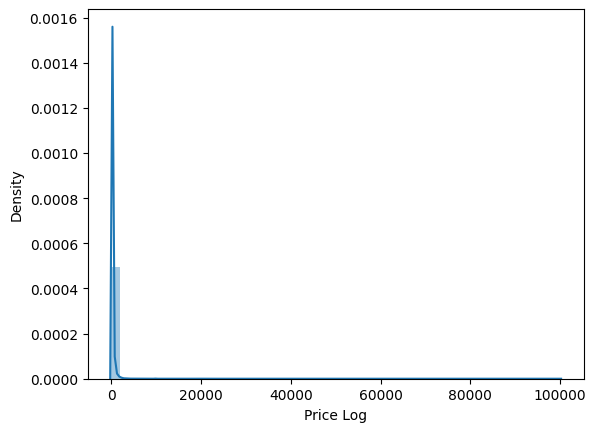

In [39]:
sns.distplot(df["price"], axlabel="Price Log");


# Create df for pipeline:
- Drop:
  - Free text columns we already converted to polarity and subjectivity:
    - `'description', 'neighborhood_overview', 'host_about'`
  - `amenities_keep` (the list of amenities we already transformed to boolean columns

In [40]:
df = df.drop(['description', 'neighborhood_overview', 'host_about', 'amenities_keep'], axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274958 entries, 0 to 274957
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   host_has_profile_pic     274958 non-null  int64  
 1   host_identity_verified   274958 non-null  int64  
 2   latitude                 274958 non-null  float64
 3   longitude                274958 non-null  float64
 4   property_type            274958 non-null  object 
 5   room_type                274958 non-null  object 
 6   accommodates             274958 non-null  int64  
 7   bedrooms                 205357 non-null  float64
 8   beds                     272084 non-null  float64
 9   price                    274958 non-null  float64
 10  minimum_nights           274958 non-null  int64  
 11  maximum_nights           274958 non-null  int64  
 12  instant_bookable         274958 non-null  int64  
 13  city                     274958 non-null  object 
 14  stat

# Inspect Columns to OHE

## Categorical Columns:

In [42]:
data_table.enable_dataframe_formatter()
cat_cols = []
for col in range(df.shape[1]):
  if df[df.columns[col]].dtypes == 'object':
    cat_cols.append(df.columns[col])
print("Categorical Columns")
print()
for col in cat_cols:
  print(col)
cat_df = df[cat_cols]
print()
cat_df.apply(lambda cat_df: cat_df.sample(5, random_state=0))

Categorical Columns

property_type
room_type
city
state



,property_type,room_type,city,state
114282,Room in boutique hotel,Private room,Rochester,New York
119428,Entire rental unit,Entire homeapt,New York City,New York
269296,Room in hotel,Private room,Clark County,Nevada
196869,Entire home,Entire homeapt,Austin,Texas
215411,Entire home,Entire homeapt,Twin Cities,Minnesota


In [43]:
# There are no nulls in the categorical columns
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274958 entries, 0 to 274957
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   property_type  274958 non-null  object
 1   room_type      274958 non-null  object
 2   city           274958 non-null  object
 3   state          274958 non-null  object
dtypes: object(4)
memory usage: 8.4+ MB


In [44]:
DataFrame(df['property_type'].value_counts())

,property_type
Entire rental unit,71605
Entire home,60266
Entire condo,34403
Private room in home,24538
Private room in rental unit,17590
...,...
Riad,1
Private room in bus,1
Shared room in nature lodge,1
Shared room in castle,1


In [45]:
DataFrame(df['room_type'].value_counts())

,room_type
Entire homeapt,208476
Private room,63295
Shared room,2379
Hotel room,808


In [46]:
DataFrame(df['city'].value_counts())

,city
Los Angeles,44594
New York City,38792
Hawaii,33339
Broward County,17915
Clark County,16639
Austin,14861
San Diego,12497
Nashville,8584
Chicago,8528
Santa Clara County,6853


In [47]:
DataFrame(df['state'].value_counts())

,state
California,72079
New York,39730
Hawaii,33339
Texas,22295
Florida,17915
Nevada,16639
Tennessee,8584
Illinois,8528
Washington,6823
Louisiana,6783


## Boolean Columns:

In [48]:
bool_cols = []
for col in range(df.shape[1]):
  nunique_vals = df.iloc[:,col].nunique()
  if nunique_vals == 2:
    bool_cols.append(df.columns[col])
print("Boolean Columns")
print()
for col in bool_cols:
  print(col)
bool_df = df[bool_cols]
print()
bool_df.apply(lambda bool_df: bool_df.sample(5, random_state=0))

Boolean Columns

host_has_profile_pic
host_identity_verified
instant_bookable
license_bool
is_shared_bathroom
air_conditioning
kitchen
wifi
free_park_prem
pets_allowed
pool



,host_has_profile_pic,host_identity_verified,instant_bookable,license_bool,is_shared_bathroom,air_conditioning,kitchen,wifi,free_park_prem,pets_allowed,pool
114282,1,1,1,0,0,1,1,1,1,0,1
119428,1,1,0,0,0,1,1,1,0,0,0
269296,1,1,1,0,0,1,0,1,0,0,1
196869,1,1,0,0,0,1,1,1,1,0,0
215411,1,1,1,1,0,1,1,1,1,1,0


In [49]:
# There are no nulls in the boolean columns:
df[bool_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274958 entries, 0 to 274957
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   host_has_profile_pic    274958 non-null  int64
 1   host_identity_verified  274958 non-null  int64
 2   instant_bookable        274958 non-null  int64
 3   license_bool            274958 non-null  int64
 4   is_shared_bathroom      274958 non-null  int64
 5   air_conditioning        274958 non-null  int64
 6   kitchen                 274958 non-null  int64
 7   wifi                    274958 non-null  int64
 8   free_park_prem          274958 non-null  int64
 9   pets_allowed            274958 non-null  int64
 10  pool                    274958 non-null  int64
dtypes: int64(11)
memory usage: 23.1 MB


## Numeric Columns (Excluding `price` and `bool_cols`)

In [50]:
num_cols = []
for col in range(df.shape[1]):
  if df[df.columns[col]].dtypes != 'object' and df.columns[col] not in bool_cols:
    num_cols.append(df.columns[col])
num_cols.remove('price')
print("Numeric Columns")
print()
for col in num_cols:
  print(col)
num_df = df[num_cols]
print()
num_df.apply(lambda num_df: num_df.sample(5, random_state=0))

Numeric Columns

latitude
longitude
accommodates
bedrooms
beds
minimum_nights
maximum_nights
bathrooms
desc_polarity
desc_subjectivity
neigh_over_polarity
neigh_over_subjectivity
host_about_polarity
host_about_subjectivity



,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,bathrooms,desc_polarity,desc_subjectivity,neigh_over_polarity,neigh_over_subjectivity,host_about_polarity,host_about_subjectivity
114282,43.155015,-77.589279,2,1.0,1.0,1,365,1.0,0.220714,0.416429,0.000000,0.000000,0.000000,0.000000
119428,40.680720,-73.982490,2,1.0,1.0,30,1125,1.0,0.111588,0.312163,0.395623,0.477273,0.000000,0.000000
269296,36.110140,-115.171743,2,1.0,1.0,1,28,1.0,0.334091,0.521970,0.000000,0.000000,0.000000,0.000000
196869,30.261490,-97.717400,5,NaN,1.0,1,1125,1.0,0.155073,0.474403,0.234127,0.573016,0.566667,0.466667
215411,44.905330,-93.327470,8,3.0,3.0,2,1125,2.0,0.405000,0.632500,0.500000,0.666667,0.318182,0.527273


In [51]:
# There are nulls in bedrooms, beds, bathrooms, but relatively few
# We'll use a simple imputer for the numeric col nulls
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274958 entries, 0 to 274957
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   latitude                 274958 non-null  float64
 1   longitude                274958 non-null  float64
 2   accommodates             274958 non-null  int64  
 3   bedrooms                 205357 non-null  float64
 4   beds                     272084 non-null  float64
 5   minimum_nights           274958 non-null  int64  
 6   maximum_nights           274958 non-null  int64  
 7   bathrooms                274616 non-null  float64
 8   desc_polarity            274958 non-null  float64
 9   desc_subjectivity        274958 non-null  float64
 10  neigh_over_polarity      274958 non-null  float64
 11  neigh_over_subjectivity  274958 non-null  float64
 12  host_about_polarity      274958 non-null  float64
 13  host_about_subjectivity  274958 non-null  float64
dtypes: f

# Add Intercept to Data:
- We can avoid biased residuals if we add an intercept
- https://medium.com/datascienceray/why-add-an-intercept-column-into-datasets-a2385cdb33bc

In [52]:
df['intercept'] = 1

In [53]:
df['intercept'].value_counts()

1    274958
Name: intercept, dtype: int64

# Define Modeling Class ModelWithCV()

In [54]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''

    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()

    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.

        Args:
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)
        '''

        cv_X = X if X else self.X
        cv_y = y if y else self.y

        # MSE Results:
        self.cv_mse_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring ='neg_mean_squared_error')
        self.cv_mse_mean = np.mean(self.cv_mse_results)
        self.cv_mse_median = np.median(self.cv_mse_results)
        self.cv_mse_std = np.std(self.cv_mse_results)

        # MAE Results:
        self.cv_mae_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring ='neg_mean_absolute_error')
        self.cv_mae_mean = np.mean(self.cv_mae_results)
        self.cv_mae_median = np.median(self.cv_mae_results)
        self.cv_mae_std = np.std(self.cv_mae_results)

        # RMSE Results:
        self.cv_rmse_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring ='neg_root_mean_squared_error')
        self.cv_rmse_mean = np.mean(self.cv_rmse_results)
        self.cv_rmse_median = np.median(self.cv_rmse_results)
        self.cv_rmse_std = np.std(self.cv_rmse_results)

        # R2 Results:
        self.cv_r2_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds, scoring = 'r2')
        self.cv_r2_mean = np.mean(self.cv_r2_results)
        self.cv_r2_median = np.median(self.cv_r2_results)
        self.cv_r2_std = np.std(self.cv_r2_results)

    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            R-Squared: {self.cv_r2_mean:.5f} ± {self.cv_r2_std:.5f}
            Root Mean Squared Error: {self.cv_rmse_mean*-1} ± {self.cv_rmse_std:.5f}
            Mean Absolute Error: {self.cv_mae_mean*-1} ± {self.cv_mae_std:.5f}
            Mean Squared Error: {self.cv_mse_mean*-1} ± {self.cv_mse_std:.5f}
            10-fold Cross Validation Scores: {self.cv_r2_results}
        ''')
        print(cv_summary)

# Train Test Split

## First Split

In [55]:
# Create X (predictors) and y (target) variables:
X_1 = df.drop('price', axis=1)
y_1 = df['price']

# Split Data into train and test:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, random_state=666)

## Second Split

In [56]:
# Split Data into train and test:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_1_train, y_1_train, random_state=666)


# Pipeline Set-up

### Boolean features don't need to be scaled
- so we will use 'remainder='passthrough'' To indicate to compiler to let them through pipeline without transformations.

In [57]:
print(cat_cols)

['property_type', 'room_type', 'city', 'state']


In [58]:
print(bool_cols)

['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'license_bool', 'is_shared_bathroom', 'air_conditioning', 'kitchen', 'wifi', 'free_park_prem', 'pets_allowed', 'pool']


In [59]:
print(num_cols)

['latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'bathrooms', 'desc_polarity', 'desc_subjectivity', 'neigh_over_polarity', 'neigh_over_subjectivity', 'host_about_polarity', 'host_about_subjectivity']


## Pipeline for numerics:

In [60]:
# Pipeline for numerics (SCALE data):

numpipe = Pipeline([
    ('stan_scale', StandardScaler()),
    ('num_impute', SimpleImputer(strategy='median'))
])


## Pipeline for Categoricals:

In [61]:
# Pipeline for categorical feature (One-Hot-Encode):
catpipe = Pipeline([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) # Using handle_unknown param en lieu of stratify during train-test-split
])

## We now have our numeric and categorical pipelines.
- Since we don't have any nulls, and binary features don't need to be transformed or one-hot-encoded,
- Our binary features don't need any transformations, so we will use `remainder='passthrough'` to let them through.
- Next step is to handle columns holistically with `ColumnTransformer`

## Create Column Transformer:

In [62]:
# We will use our pipeline objects as transformer argument for ColumnTransformer
# our transformer is a tuple and includes a `columns` argument

ColTrans = ColumnTransformer(transformers=[
    ('numerics', numpipe, num_cols),
    ('categoricals', catpipe, cat_cols)
], remainder='passthrough')

# Model #1: Baseline Dummy

## Dummy Model Pipeline:

In [63]:
# Create Dummy Model Pipeline
dumpipe = Pipeline([
    ('ct', ColTrans),
    ('dummy', DummyRegressor(strategy='mean'))
])

In [64]:
# Fit the dummy regressor to the training data:
dumpipe.fit(X_2_train, y_2_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('stan_scale',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['latitude', 'longitude',
                                                   'accommodates', 'bedrooms',
                                                   'beds', 'minimum_nights',
                                                   'maximum_nights',
                                                   'bathrooms', 'desc_polarity',
                                                   'desc_subjectivity',
                                                   'neigh_over_polarity',
                                                   'neigh_over_subjectivity',
                                                   'host_about_polarity',
                                                   'host_about_subjectivity']),
                                                 ('categoricals',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type', 'room_type',
                                                   'city', 'state'])])),
                ('dummy', DummyRegressor())])

## Dummy Regressor Cross validation on Training Data

In [65]:

# Now let's instantiate a dummy pipeline model and fit via inheritance from the ModelWithCV class:
dum_pipe_cv = ModelWithCV(
    dumpipe,
    model_name='dummy',
    X=X_2_train,
    y=y_2_train,
)

In [66]:
dum_pipe_cv.print_cv_summary()

CV Results for `dummy` model:
            R-Squared: -0.00004 ± 0.00004
            Root Mean Squared Error: 951.4114265294854 ± 137.36254
            Mean Absolute Error: 219.10723721594718 ± 4.37318
            Mean Squared Error: 924052.1695826652 ± 257613.42217
            10-fold Cross Validation Scores: [-9.71921643e-07 -1.29942088e-05 -1.19020139e-04 -8.16565079e-06
 -3.91309529e-05]
        


## Dummy Regressor Results on Test Data:
- Adapted from: https://gnpalencia.org/optbinning/tutorials/tutorial_binning_process_sklearn_pipeline.html

In [67]:
y_1_test_pred_dumpipe = dumpipe.predict(X_1_test)

print("R2 score: {:.5f}".format(r2_score(y_1_test, y_1_test_pred_dumpipe)))
print("RMSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_dumpipe, squared=False)))
print("MAE:      {:.5f}".format(mean_absolute_error(y_1_test, y_1_test_pred_dumpipe)))
print("MSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_dumpipe)))


R2 score: -0.00000
RMSE:      938.60851
MAE:      221.39243
MSE:      880985.93413


# Model #2: Lasso ("At least r2 isn't negative") Regression

In [68]:
# Create Lasso Model Pipeline
lassopipe = Pipeline([
    ('ct', ColTrans),
    ('lasso', Lasso())
])

In [69]:
lassopipe.fit(X_1_train, y_1_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('stan_scale',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['latitude', 'longitude',
                                                   'accommodates', 'bedrooms',
                                                   'beds', 'minimum_nights',
                                                   'maximum_nights',
                                                   'bathrooms', 'desc_polarity',
                                                   'desc_subjectivity',
                                                   'neigh_over_polarity',
                                                   'neigh_over_subjectivity',
                                                   'host_about_polarity',
                                                   'host_about_subjectivity']),
                                                 ('categoricals',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type', 'room_type',
                                                   'city', 'state'])])),
                ('lasso', Lasso())])

In [70]:
lassopipe_cv = ModelWithCV(
    lassopipe,
    model_name='lasso',
    X=X_2_train,
    y=y_2_train,
)

In [71]:
lassopipe_cv.print_cv_summary()

CV Results for `lasso` model:
            R-Squared: 0.07817 ± 0.02241
            Root Mean Squared Error: 914.9255694772726 ± 142.04926
            Mean Absolute Error: 178.94954557628338 ± 3.38633
            Mean Squared Error: 857266.7906274914 ± 255512.36661
            10-fold Cross Validation Scores: [0.10253108 0.05482181 0.06086769 0.06463992 0.1079843 ]
        


#### Compare to Dummy Model CV Results:
- CV Results for `dummy` model:
  - R-Squared: -0.00004 ± 0.00004
  - Root Mean Squared Error: 951.4114265294854 ± 137.36254
  - Mean Absolute Error: 219.10723721594718 ± 4.37318
  - Mean Squared Error: 924052.1695826652 ± 257613.42217
  - 10-fold Cross Validation Scores: [-9.71921643e-07 -1.29942088e-05 -1.19020139e-04 -8.16565079e-06
 -3.91309529e-05]

## Lasso Regressor Results on Test Data:
- Adapted from: https://gnpalencia.org/optbinning/tutorials/tutorial_binning_process_sklearn_pipeline.html

In [72]:
y_1_test_pred_lassopipe = lassopipe.predict(X_1_test)

print("R2 score: {:.5f}".format(r2_score(y_1_test, y_1_test_pred_lassopipe)))
print("RMSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_lassopipe, squared=False)))
print("MAE:      {:.5f}".format(mean_absolute_error(y_1_test, y_1_test_pred_lassopipe)))
print("MSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_lassopipe)))


R2 score: 0.08524
RMSE:      897.71416
MAE:      178.93013
MSE:      805890.70612


#### Compare to Dummy Regressor Results on Test:
- R2 score: -0.00000
- RMSE:      938.60851
- MAE:      221.39243
- MSE:      880985.93413

# Model #3: RidgeRegression

In [73]:
# Create Ridge Model Pipeline

ridgepipe = Pipeline([
    ('ct', ColTrans),
    ('ridge', Ridge())
])

In [74]:
ridgepipe.fit(X_1_train, y_1_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('stan_scale',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['latitude', 'longitude',
                                                   'accommodates', 'bedrooms',
                                                   'beds', 'minimum_nights',
                                                   'maximum_nights',
                                                   'bathrooms', 'desc_polarity',
                                                   'desc_subjectivity',
                                                   'neigh_over_polarity',
                                                   'neigh_over_subjectivity',
                                                   'host_about_polarity',
                                                   'host_about_subjectivity']),
                                                 ('categoricals',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type', 'room_type',
                                                   'city', 'state'])])),
                ('ridge', Ridge())])

In [75]:
ridgepipe_cv = ModelWithCV(
    ridgepipe,
    model_name='ridge',
    X=X_2_train,
    y=y_2_train,
)

In [76]:
ridgepipe_cv.print_cv_summary()

CV Results for `ridge` model:
            R-Squared: 0.08069 ± 0.02296
            Root Mean Squared Error: 913.7090890478427 ± 142.05391
            Mean Absolute Error: 181.1914741839282 ± 3.36074
            Mean Squared Error: 855043.613752242 ± 255034.97026
            10-fold Cross Validation Scores: [0.10349199 0.05722112 0.06379324 0.06574233 0.11318313]
        


#### Compare to Lasso CV Results:
- CV Results for `lasso` model:
  - R-Squared: 0.07817 ± 0.02241
  - Root Mean Squared Error: 914.9255694772726 ± 142.04926
  - Mean Absolute Error: 178.94954557628338 ± 3.38633
  - Mean Squared Error: 857266.7906274914 ± 255512.36661
  - 10-fold Cross Validation Scores: [0.10253108 0.05482181 0.06086769 0.06463992 0.1079843 ]

## *Ridge* Regressor Results on Test Data:
- Adapted from: https://gnpalencia.org/optbinning/tutorials/tutorial_binning_process_sklearn_pipeline.html

In [77]:
y_1_test_pred_ridgepipe = ridgepipe.predict(X_1_test)

print("R2 score: {:.5f}".format(r2_score(y_1_test, y_1_test_pred_ridgepipe)))
print("RMSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_ridgepipe, squared=False)))
print("MAE:      {:.5f}".format(mean_absolute_error(y_1_test, y_1_test_pred_ridgepipe)))
print("MSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_ridgepipe)))

R2 score: 0.08891
RMSE:      895.91052
MAE:      181.02224
MSE:      802655.66502


## Compare to Lasso Results on Test Data:
- R2 score: 0.08524
- RMSE:      897.71416
- MAE:      178.93013
- MSE:      805890.70612

# Final Model: Grid-Searched Ridge Regression

## Print Available Hyper-parameters for Ridge Regression:

In [78]:
# Print all of my ridge() object's hyperparameters:
for key in ridgepipe.get_params().keys():
    if key.startswith('ridge__'):
        print(key)

ridge__alpha
ridge__copy_X
ridge__fit_intercept
ridge__max_iter
ridge__positive
ridge__random_state
ridge__solver
ridge__tol


In [79]:
ridge_search_space = {'ridge__alpha':[.5, 1, 2, 5, 10, 15, 20, 25, 30, 35, 40],
                      'ridge__solver':['auto', 'svd', 'lsqr', 'sparse_output', 'saga']
                      }

In [80]:
ridge_grid_search = GridSearchCV(ridgepipe, ridge_search_space, n_jobs=-1, cv=5, return_train_score=True)

In [81]:
#!pip install ipython-autotime
#%load_ext autotime

In [82]:
import time, psutil
uptime = time.time() - psutil.boot_time()
remain = 12*60*60 - uptime

In [83]:
%%time
#ridge_grid_search.fit(X_2_train,y_2_train)

CPU times: user 12 µs, sys: 10 µs, total: 22 µs
Wall time: 6.68 µs


In [84]:
#print('Best Hyperparameters: %s' % ridge_grid_search.best_params_)

## Use best alpha to evaluate

In [85]:
# Create Ridge Model with Best HyperParameters Pipeline
# Best Hyperparameters: {'ridge__alpha': 10, 'ridge__solver': 'svd'}

ridge_grid_use_best_alpha = Pipeline([
    ('ct', ColTrans),
    ('ridge', Ridge(alpha=10, solver='svd'))
])

In [86]:
ridge_grid_use_best_alpha.fit(X_1_train, y_1_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('stan_scale',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['latitude', 'longitude',
                                                   'accommodates', 'bedrooms',
                                                   'beds', 'minimum_nights',
                                                   'maximum_nights',
                                                   'bathrooms', 'desc_polarity',
                                                   'desc_subjectivity',
                                                   'neigh_over_polarity',
                                                   'neigh_over_subjectivity',
                                                   'host_about_polarity',
                                                   'host_about_subjectivity']),
                                                 ('categoricals',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type', 'room_type',
                                                   'city', 'state'])])),
                ('ridge', Ridge(alpha=10, solver='svd'))])

In [87]:
ridge_grid_use_best_alpha_cv = ModelWithCV(
    ridge_grid_use_best_alpha,
    model_name='ridge grid best alpha',
    X=X_2_train,
    y=y_2_train,
)

In [88]:
ridge_grid_use_best_alpha_cv.print_cv_summary()

CV Results for `ridge grid best alpha` model:
            R-Squared: 0.08085 ± 0.02324
            Root Mean Squared Error: 913.6458798251595 ± 142.17890
            Mean Absolute Error: 181.04687996619052 ± 3.36243
            Mean Squared Error: 854963.6334295947 ± 255256.60393
            10-fold Cross Validation Scores: [0.10473185 0.05698198 0.06368835 0.06576079 0.11307919]
        


CV Results for `ridge` model:
- R-Squared: 0.08069 ± 0.02296
- Root Mean Squared Error: 913.7090890478427 ± 142.05391
- Mean Absolute Error: 181.1914741839282 ± 3.36074
- Mean Squared Error: 855043.613752242 ± 255034.97026
- 10-fold Cross Validation Scores: [0.10349199 0.05722112 0.06379324 0.06574233 0.11318313]

In [89]:
y_1_test_pred_ridge_grid_use_best_alpha = ridge_grid_use_best_alpha.predict(X_1_test)

print("R2 score: {:.5f}".format(r2_score(y_1_test, y_1_test_pred_ridge_grid_use_best_alpha)))
print("RMSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_ridge_grid_use_best_alpha, squared=False)))
print("MAE:      {:.5f}".format(mean_absolute_error(y_1_test, y_1_test_pred_ridge_grid_use_best_alpha)))
print("MSE:      {:.5f}".format(mean_squared_error(y_1_test, y_1_test_pred_ridge_grid_use_best_alpha)))

R2 score: 0.08903
RMSE:      895.85366
MAE:      180.86294
MSE:      802553.77234


# Final Evaluation

In [90]:
# Create Ridge Model with Best HyperParameters Pipeline
# Best Hyperparameters: {'ridge__alpha': 10, 'ridge__solver': 'svd'}

final_pipe = Pipeline([
    ('ct', ColTrans),
    ('ridge', Ridge(alpha=10, solver='svd'))
])

In [91]:
final_pipe.fit(X_2_train, y_2_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('stan_scale',
                                                                   StandardScaler()),
                                                                  ('num_impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['latitude', 'longitude',
                                                   'accommodates', 'bedrooms',
                                                   'beds', 'minimum_nights',
                                                   'maximum_nights',
                                                   'bathrooms', 'desc_polarity',
                                                   'desc_subjectivity',
                                                   'neigh_over_polarity',
                                                   'neigh_over_subjectivity',
                                                   'host_about_polarity',
                                                   'host_about_subjectivity']),
                                                 ('categoricals',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['property_type', 'room_type',
                                                   'city', 'state'])])),
                ('ridge', Ridge(alpha=10, solver='svd'))])

In [93]:
final_pipe_cv = ModelWithCV(
    ridge_grid_use_best_alpha,
    model_name='final model',
    X=X_2_train,
    y=y_2_train,
)

In [94]:
final_pipe_cv.print_cv_summary()

CV Results for `final model` model:
            R-Squared: 0.08085 ± 0.02324
            Root Mean Squared Error: 913.6458798251595 ± 142.17890
            Mean Absolute Error: 181.04687996619052 ± 3.36243
            Mean Squared Error: 854963.6334295947 ± 255256.60393
            10-fold Cross Validation Scores: [0.10473185 0.05698198 0.06368835 0.06576079 0.11307919]
        


CV Results for `ridge` model:
- R-Squared: 0.08069 ± 0.02296
- Root Mean Squared Error: 913.7090890478427 ± 142.05391
- Mean Absolute Error: 181.1914741839282 ± 3.36074
- Mean Squared Error: 855043.613752242 ± 255034.97026
- 10-fold Cross Validation Scores: [0.10349199 0.05722112 0.06379324 0.06574233 0.11318313]

In [95]:
final_model_pred = final_pipe.predict(X_1_test)

print("R2 score: {:.5f}".format(r2_score(y_1_test, final_model_pred)))
print("RMSE:      {:.5f}".format(mean_squared_error(y_1_test, final_model_pred, squared=False)))
print("MAE:      {:.5f}".format(mean_absolute_error(y_1_test, final_model_pred)))
print("MSE:      {:.5f}".format(mean_squared_error(y_1_test, final_model_pred)))

R2 score: 0.08909
RMSE:      895.82135
MAE:      182.21817
MSE:      802495.88610
